# Laboratoire 1
## Capteurs infrarouges sharp
**Matériel nécessaire :** règle de 1 mètre en aluminium, règle de 30 centimètres, obstacle (boîte), ruban adhésif, feuille blanche et carton noir.

![img](img/Sharp_2Y0A02.jpg)

## Partie 1 Courbe de calibration d’un capteur

Dans cette première partie du laboratoire, vous allez voir comment on peut calibrer un capteur, particulièrement s’il est nonlinéaire. L’idée de base consiste à placer une cible à différents endroits ($x$ en cm), et à mesurer la sortie du capteur ($z$ en Volt). Ainsi, vous allez échantillonner manuellement la fonction $z=f_{capteur}(x)$. Bien que le manufacturier vous fournisse une telle fonction (voir la figure suivante), les aléas de la fabrication font en sorte que chaque capteur est différent. Le capteur à utiliser est celui à longue portée (Sharp 2Y0A02).

![img](img/Sharp_datasheet.png)

### Exercice 1 - Feuille de spécifications
Cherchez la feuille de spécifications du capteur Sharp 2Y0A02 et trouvez les informations suivantes :
1. La plage de mesure du capteur;
2. La longueur d’onde du faisceau infrarouge;
3. Que ce passe-t-il si le capteur est placé face au soleil ou certaines sources de lumière?

In [3]:
# Importation des modules

%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from robmob.robot import Robot
from robmob.rover.sensors import SharpSensor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Modifiez la valeur de `ip_robot` selon le robot qui vous a été assigné.

In [5]:
# Connexion au robot
ip_robot = 'localhost'
robot = Robot(ip_robot)
robot.connect()

Il faut ensuite ajouter le capteur Sharp aux capteurs écoutés par le robot.

In [6]:
sharp_sensor = SharpSensor()

robot.add_sensor(sharp_sensor)

Par défaut, on sauvegarde un buffer de 100 échantillons. 
Puisque l'acquisition des données se fait à 100hz, on retrouve dans le buffer de la dernière seconde d'acquisition.
Détail très important : les mesures que vous faites vont être bruitées, ce qui signifie qu’en réalité c’est plutôt $z=N(f_{capteur}(x), \sigma_z^2)$ que vous capturez avec le convertisseur analogue-numérique, où $N(\mu, \sigma^2)$ est une distribution normale centrée sur $\mu$ avec variance $\sigma^2$. 
Pour réduire l’erreur due au bruit, les mesures seront moyennées avec la fonction numpy [average](http://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html).


In [24]:
data = sharp_sensor.read_buffer()
print(data)

print("La lecture moyenne est de %0.2f" % np.average(data))

[0.02475076 0.02587579 0.0228757  0.0262508  0.02850087 0.02850087
 0.02437574 0.02756334 0.02700082 0.02868837 0.0260633  0.03000092
 0.02512577 0.02550078 0.03150096 0.03075094 0.0262508  0.0260633
 0.02343822 0.02493826 0.02756334 0.02850087 0.02437574 0.02550078
 0.0260633  0.02775085 0.02437574 0.02681332 0.02737584 0.0296259
 0.0228757  0.02681332 0.02868837 0.02737584 0.02231318 0.02475076
 0.02568828 0.02587579 0.02643831 0.0260633  0.02793835 0.02718833
 0.02587579 0.02737584 0.02700082 0.02587579 0.02325071 0.02643831
 0.02756334 0.03000092 0.02550078 0.02512577 0.02568828 0.02681332
 0.0260633  0.02775085 0.02925089 0.02587579 0.02418824 0.02793835
 0.02981341 0.02793835 0.02343822 0.0260633  0.02681332 0.02662581
 0.02587579 0.0262508  0.02775085 0.02362572 0.02831336 0.02718833
 0.02681332 0.0260633  0.02493826 0.02831336 0.02756334 0.02831336
 0.02362572 0.02756334 0.0262508  0.0294384  0.0262508  0.02662581
 0.02662581 0.02400073 0.02475076 0.02681332 0.02887588 0.025313

## Exercice 2 - Expérimentation avec le capteur
Essayez de placer un objet devant le capteur et de prendre une mesure.
1. Quels sont les unités de la mesure? Utilisez la feuille de spécifications pour convertir la mesure en cm.
2. Quelle est la plage de valeurs retournées par le capteur?
3. Que se passe-t-il si l’objet est trop proche du capteur?
4. Que se passe-t-il si l’objet est trop loin du capteur?
5. Que ce passe-t-il si vous bloquez le faisceau infrarouge avec votre main devant l'émetteur? Identifiez lequel est l'émetteur et lequel est le récepteur avec la feuille de spécifications.

## Exercice 3 - Calibration du capteur

Ici, on vous demande de calibrer le capteur de distance.
Pour ce faire, vous devrez prendre des mesures de voltage pour plusieurs distances connues.

Placez un objet devant le robot de la sorte:

![img](img/Sharp_exp1.png)

Remarquez que le capteur est placé de façon verticale sur la tourelle du robot, à une
distance minimum de 10 cm de la table, afin de limiter les mauvaises réflexions qui pourraient
fausser les valeurs.

### Procédure

1. Placez l’extrémité 0 cm de la règle métallique vis-à-vis le capteur infrarouge. Au besoin, utilisez du ruban adhésif pour immobiliser la règle sur la table (ça évitera bien des frustrations).
2. Utilisez une boîte en carton comme cible (genre boîte vide recouverte d’une feuille blanche) que vous placez aux positions telles que dans la table ici-bas.
3. Notez la valeur moyenne de voltage $z$ à chaque distance $x$. Pour obtenir la valeur de $z$, évaluez la cellule plus haut.
4. Après avoir pris toutes les données, tracez la courbe du capteur. Comparez-la visuellement avec la figure du manufacturier. Prenez le temps d'observer la non-linéarité de la réponse du capteur, ainsi que le fait qu’elle n’est pas une fonction bijective.

Distance ($x$) | Voltage ($z$)
:------------: | :-----------:
5              | ??
7.5            | ??
10             | ??
12.5           | ??
15             | ??
17.5           | ??
20             | ??
25             | ??
30             | ??
35             | ??
40             | ??
45             | ??
50             | ??
60             | ??
70             | ??
80             | ??
90             | ??
100            | ??
110            | ??
120            | ??
130            | ??
140            | ??
150            | ??

In [85]:
# TODO placer ici votre code pour prendre les mesures de distance et de voltage
data = sharp_sensor.read_buffer()
print(data)

print("La lecture moyenne est de %0.2f" % np.average(data))

[0.24769506 0.25407025 0.26550812 0.26607063 0.26794568 0.26419556
 0.26588312 0.2649456  0.26382056 0.26550812 0.26457056 0.2653206
 0.26438308 0.25032014 0.24619502 0.24525748 0.24338242 0.24488248
 0.2456325  0.24732004 0.25013262 0.24957012 0.26588312 0.2653206
 0.2656956  0.26513308 0.26513308 0.26550812 0.26607063 0.28107107
 0.29813409 0.28632125 0.2850087  0.25257021 0.22575688 0.2227568
 0.22331932 0.23531967 0.26738316 0.26663312 0.2649456  0.2656956
 0.26625812 0.26457056 0.26550812 0.2649456  0.2653206  0.26644564
 0.26400805 0.26419556 0.27675843 0.26813319 0.2653206  0.27150828
 0.28632125 0.28632125 0.28725877 0.28707126 0.28950885 0.2853837
 0.28575873 0.27975854 0.26607063 0.26475808 0.26832068 0.25275773
 0.2460075  0.24375744 0.24356994 0.31069699 0.31107199 0.3240099
 0.31069699 0.31107199 0.31163451 0.30919695 0.31032196 0.29025885
 0.28632125 0.28557122 0.28650874 0.27807099 0.27957103 0.27263331
 0.28407118 0.22650692 0.22669442 0.22481936 0.23119456 0.28650874
 

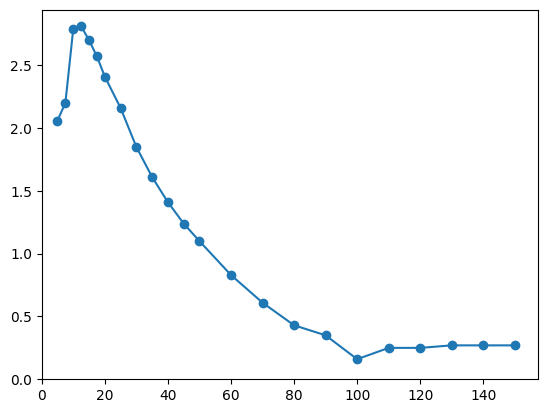

In [86]:
# Tableaux de distances et de mesures
# Il est important de garder le point (distance = 0, volts = 0)
xs = [5,7.5,10,12.5,15,17.5,20,25,30,35,40,45,50,60,70,80,90,100,110,120,130,140,150]  # Entrez vos distance dans xs
zs = [2.06,2.20,2.79,2.81,2.70,2.57,2.41,2.16,1.85,1.61,1.41,1.24,1.10,0.83,0.61,0.43,0.35,0.16,0.25,0.25,0.27,0.27,0.27]  # Entrez vos vraies mesures dans le vecteur zs

plt.scatter(xs, zs)
plt.plot(xs, zs)
plt.gca().set_xlim(left=0)
plt.gca().set_ylim(bottom=0)
plt.show()

![img](img/Sharp_datasheet.png)

### Partie 2 Testez la courbe de calibration
NOTE : Il y a un bug sur Jupyter depuis 2020, les tableaux ne sont pas correctement affichés.
Pour résoudre le problème il suffit de rajouter une lettre ou un mot au tout début du tableau (première ligne première colonne).

Maintenant que vous avez une table de calibration, vous pouvez faire un télémètre infrarouge bon marché!
Pour cet exercice, vous devrez convertir une mesure de voltage du capteur (en Volt) en une distance (en cm).
Il s’agit ici d’inverser la fonction de capteur pour avoir $x=f^{-1}_{capteur}(z)$.
Or, comme la fonction $f^{-1}_{capteur}(x)$ n’est pas bijective, l’inverse n’existe pas.
Il vous faut donc scinder en deux votre table de calibration, de sorte que la première table ne contient que les données de voltage croissant avec la distance, et la deuxième table les données de voltage décroissant avec la distance.

Par exemple, si vous avez les données suivantes :


.  |      |      |      |     |      |      |      |      |      |      |      |      |      |     |
-- | ---- | ---- | ---- | --- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ----
**x**  | 5    | 10   | 15   | 20  | 25   | 30   | 40   | 50   | 60   | 80   | 100  | 120  | 140  | 150
**z** | 1.5  | 2.2  | 2.5  | 3   | 2.7  | 2.4  | 2.2  | 1.9  | 1.7  | 1.6  | 1.5  | 1.4  | 1.3  | 1.25


La première table de calibration contiendra les valeurs suivantes

.   |      |      |      |     |
-- | ---- | ---- | ---- | --- |
**x**  | 5    | 10   | 15   | 20 
**z** | 1.5  | 2.2  | 2.5  | 3 

Et la deuxième table de calibration sera

.   |      |      |      |      |      |      |      |      |      |      |     |
-- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | --- |
**x**  | 20 |  25   | 30   | 40   | 50   | 60   | 80   | 100  | 120  | 140  | 150
**z** | 3   |2.7  | 2.4  | 2.2  | 1.9  | 1.7  | 1.6  | 1.5  | 1.4  | 1.3  | 1.25

In [88]:
split_index = 3  # Ceci est un exemple, veillez choisir votre index, cette valeur était
# le premier index de la deuxième table de calibration.
# NOTE: les arrays numpy sont indexés à 0.

split_value_volt = zs[split_index]

xs_proche = xs[0:split_index + 1]  # Séparation de l'array en 2 à split_index
xs_loin = xs[split_index:]

zs_proche = zs[0:split_index + 1]
zs_loin = zs[split_index:]

print("La séparation entre les deux fonctions se fait à %0.2f Volts\n" % split_value_volt)
print("Proche\n\tx:", xs_proche, "\n\tz:", zs_proche)
print("Loin\n\tx:", xs_loin, "\n\tz:", zs_loin)

La séparation entre les deux fonctions se fait à 2.81 Volts

Proche
	x: [5, 7.5, 10, 12.5] 
	z: [2.06, 2.2, 2.79, 2.81]
Loin
	x: [12.5, 15, 17.5, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150] 
	z: [2.81, 2.7, 2.57, 2.41, 2.16, 1.85, 1.61, 1.41, 1.24, 1.1, 0.83, 0.61, 0.43, 0.35, 0.16, 0.25, 0.25, 0.27, 0.27, 0.27]


À l'aide de scipy, on peut maintenant faire une fonction d'interpolation pour chacune des deux sections bijectives de la fonction.
Utilisez la fonction [interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) pour interpoler les valeurs de voltage en distance.
En d'autres mots, vous aurez deux fonctions $f_{proche}(z)$ et $f_{loin}(z)$ qui convertissent les valeurs de voltage en distance.

In [92]:
from scipy.interpolate import interp1d

# Fonction f(volts) = cm
fn_proche = interp1d(zs_proche,xs_proche)  # TODO
fn_loin = interp1d(zs_loin,xs_loin)  # TODO 

print(fn_proche(2.06))
print(fn_loin(0.27))

5.0
150.0


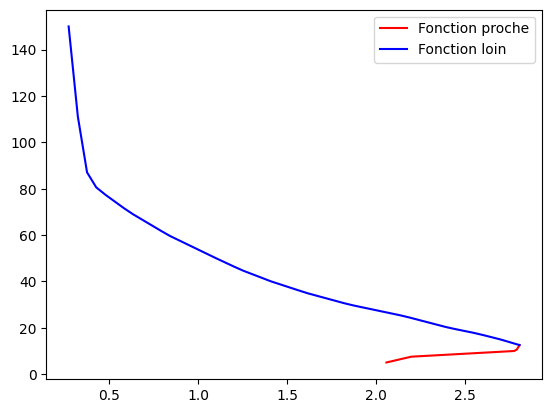

In [97]:
# Affichons les fonctions
# np.linspace prend deux arguments, qui sont les bornes inférieures 
# et supérieures des valeurs que vous voulez interpoler. Évidemment, 
# ces valeurs doivent être à l'intérieur de la courbe de calibration de 
# votre capteur...

# TODO definir les valeurs possibles de voltage pour la branche proche
borne_inferieure_proche = 2.06
borne_superieure = 2.81

domaine_proche = np.linspace(borne_inferieure_proche, borne_superieure)
codomaine_proche = fn_proche(domaine_proche)
plt.plot(domaine_proche, codomaine_proche, color='red', label='Fonction proche')

# TODO definir les valeurs possibles de voltage pour la branche loin
borne_inferieure_loin = 0.27

domaine_loin = np.linspace(borne_inferieure_loin, borne_superieure)
codomaine_loin = fn_loin(domaine_loin)
plt.plot(domaine_loin, codomaine_loin, color='blue', label='Fonction loin')

plt.legend()
plt.show()

## Exercice 4 - Conversion de la mesure en distance
Écrivez la fonction suivante qui convertie une lecture en Volts en cm en utilisant la fonction `fn_proche` ou `fn_loin` selon la mesure.
Notez que comme la fonction n'est pas bijective, la fonction `volts_to_cm` devra retourner plusieurs valeurs.

In [107]:
def volts_to_cm(volts):
    if (volts < .27 or volts > 2.81):
        return None
    if (volts < borne_superieure and volts > borne_inferieure_proche):
        return fn_proche(volts), fn_loin(volts)
    return fn_loin(volts)

In [108]:
volts_to_cm(2.0)

array(27.58064516)

La boucle suivante imprime en temps réel la distance entre le capteur Sharp et l'objet en utilisant la fonction que vous venez de définir. Pour arrêter la boucle, appuyez sur le *stop* dans l'entête du notebook ou faites deux fois la touche *i*.

In [109]:
import time
from IPython.display import clear_output

while True:
    volts = sharp_sensor.peek_data()
    cm = volts_to_cm(volts)
    clear_output(wait=True)
    print('Mesure: ', volts, 'V')
    print('Distance estimee', cm, 'cm')
    time.sleep(0.5)

Mesure:  0.8535260558128357 V
Distance estimee 59.128664599524605 cm


KeyboardInterrupt: 

Vous pourrez ainsi voir votre télémètre infrarouge en action en temps réel pendant que vous
déplacez la cible! Regardez voir si la mesure de distance à l’écran correspond bien à la position de
la boite indiquée par la règle. Vous devriez remarquer que l’erreur est plus grande lorsque la cible
est loin. Vous devriez remarquer que les valeurs fluctuent beaucoup plus quand la cible est loin (120
cm) que lorsque la cible est proche (30 cm).


### Partie 3 Réponse transversale du capteur
Pour observer la réponse transversale du capteur, il faut déplacer une petite boîte rectangulaire de 8-
10 cm de largeur à une distance de 70 cm du capteur, perpendiculairement à l’axe du faisceau. Il
faut qu’à la position de départ de la boîte, le faisceau ne soit pas en contact avec la boîte (voltage
très bas). Identifiez cette position de départ en regardant le voltage lorsque vous déplacez la boîte de
façon latérale : quand il commence à monter, c’est que la boîte pénètre dans le faisceau. Déplacez
cette boîte perpendiculairement à l’axe du faisceau par incréments de 0.5 cm. Assurez-vous que la
règle perpendiculaire soit bien fixée à la table avec du scotch tape pour ne pas qu’elle se déplace
pendant la saisie des données. Que pouvez-vous conclure de l'apparence de la boîte carrée, telle que
perçue par ce capteur?

![img](img/Sharp_exp2.png)

In [135]:
# TODO code pour prendre les mesures de la réponse transversale du capteur
data = sharp_sensor.read_buffer()
print(data)

print("La lecture moyenne est de %0.2f" % np.average(data))

[1.16628563 1.16459799 1.17097318 1.16497302 1.16459799 1.16384804
 1.16403556 1.18484867 1.18334866 1.18278611 1.18222356 1.18559873
 1.18334866 1.18391109 1.18334866 1.18447363 1.18297362 1.18166101
 1.18353617 1.16684806 1.16497302 1.16403556 1.17959845 1.18616116
 1.18241107 1.18278611 1.18541121 1.20359921 1.20172417 1.20022416
 1.20097411 1.15372276 1.14434743 1.15466022 1.14678502 1.18559873
 1.18203604 1.18241107 1.16216052 1.12803447 1.12709689 1.12634683
 1.12990952 1.15447271 1.14378488 1.14472246 1.14472246 1.16572309
 1.16403556 1.16309798 1.1891613  1.20322418 1.20172417 1.20884943
 1.18728626 1.16684806 1.16366053 1.16384804 1.16759813 1.18578613
 1.18353617 1.18166101 1.18316114 1.1698482  1.1659106  1.16441059
 1.17828596 1.18391109 1.18334866 1.18184853 1.19272387 1.20584929
 1.20153666 1.20097411 1.20059919 1.16516054 1.16459799 1.16422307
 1.16628563 1.16684806 1.16553557 1.16403556 1.15222263 1.14866006
 1.15109766 1.14547241 1.15559781 1.16628563 1.16366053 1.1636

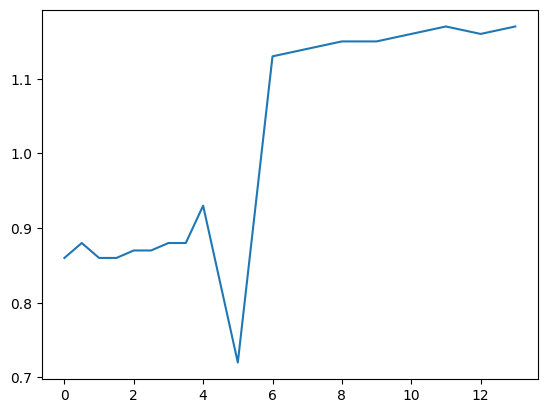

In [136]:
positions_horizontale = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0,
                         8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

# TODO remplir les données
volts = [0.86,0.88,0.86,0.86,0.87,0.87,0.88,0.88,0.93,0.72,1.13,1.14,1.15,1.15,1.16,1.17,1.16,1.17]

plt.plot(positions_horizontale, volts)

## Exercice 5 - Analyse de la réponse transversale
1. Que ce passe-t-il avec la mesure de voltage lorsque la boîte est déplacée latéralement?
2. Quel est l'impact sur le bruit de la mesure lorsque la boîte est déplacée latéralement? Utilisez `np.std` pour calculer l'écart-type des mesures.

### Partie 4 Dimension de la cible

Placez un objet de faible largeur (1-2 cm) à 30, 40, 60 et 90 cm du capteur. En
déplaçant la cible transversalement, trouvez la valeur maximale du voltage (qui correspondra à la
cible placée au centre du faisceau). Comparez les valeurs de voltage de ce pic à celles
préalablement obtenues avec la grosse boîte de carton pour les mêmes distances. D'après vous,
pourquoi les valeurs sont-elles différentes? En particulier, y aura-t-il une erreur d’estimation de la
distance pour ces petites cibles?


Position ($x$) | Voltage ($z$)
:------------: | :-----------:
30             | ??
40             | ??
60             | ??
90             | ??

In [ ]:
max_volts = 0.0

while True:
    volts = sharp_sensor.peek_data()
    clear_output(wait=True)
    max_volts = volts if volts > max_volts else max_volts
    print("Voltage max: %0.2f" % max_volts)
    time.sleep(0.5)